## Laboratorium 4 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

In [3]:
# obliczanie odległości między punktami
def edist(p1, p2, features):
    a=[]
    b=[]
    for i in features:
        a.append(p1[i])
        b.append(p2[i])
    c=0
    for i in range(len(features)):
        c += (a[i]-b[i])**2
    return c**(1/2) 

In [4]:
# wybór klas
def choose_classes(classes):
    for i in range(len(classes)):
        if i == 0:
            c_train = np.array(train[train[:,0] == classes[i]])
            c_test = np.array(test[test[:,0] == classes[i]])
        else:
            c_train = np.vstack((c_train,train[train[:,0] == classes[i]]))
            c_test = np.vstack((c_test,test[test[:,0] == classes[i]]))
    return c_train, c_test

In [5]:
def centeroid(arr):
    ans =[]
    length = arr.shape[0]
    for i in range(arr.shape[1]):
        suma  = np.sum(arr[:,i])
        ans.append(suma/length)
    return ans


In [12]:
# klasyfikator nm
def centers(train,classes):
    centers =[]
    for i, c in enumerate(classes):
        center = train[train[:,0] == c]
        centers.append(centeroid(center))
    centers = np.array(centers)
    return centers
    
def nM(train, test, features, centers, dist=0):
    classified = np.copy(test)
    # centers zawiera wartość średnią z każdego parametru

    for te in range(len(test)):
        nearest = 100
        for tr in range (len(centers)):
            if dist == 0:
                distance = edist(test[te], centers[tr], features)
            if distance < nearest:
                nearest = distance
                classified[te,0] = centers[tr,0]
    
    return classified

In [7]:
def acc(classified,test):
    correct = (test[:,0] == classified[:,0])
    correct = np.count_nonzero(correct)
    return correct/len(classified)

In [8]:
features = [4,8]
# classes=[1,2,3,4,5,6,7,8,9,10]
classes = [5,8]

# tworzenie podzbiorów dla wybranych klas
new_train, new_test = choose_classes(classes)

centers = centers(new_train, classes)
classified = nM(new_train, new_test, features, centers)

print(f'Accuracy dla klasyfikacji na podstawie cech 4 i 8: {acc(classified, new_test): .1%}')

Accuracy dla klasyfikacji na podstawie cech 4 i 8:  100.0%


Accuracy dla klasyfikacji na podstawie cech 4 i 8 dla 5 klas:  100.0%


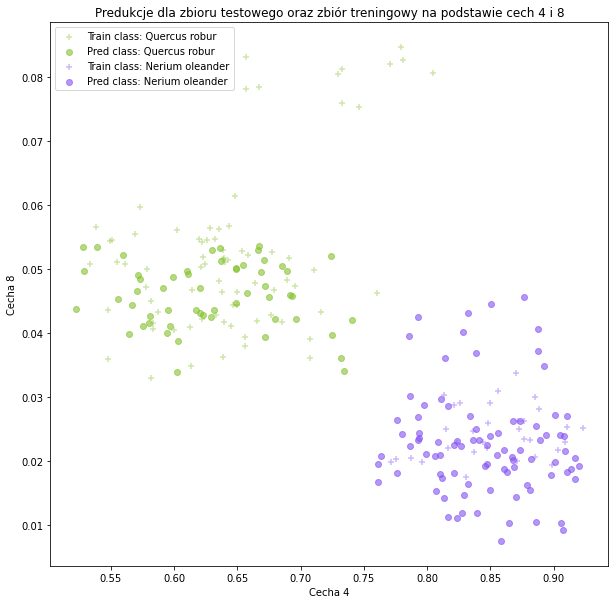

In [9]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
color = []
for i in range(41):
    color.append((random.randint(0,100)/100,random.randint(0,100)/100,random.randint(0,100)/100))

nazwy = {3: 'Populus nigra',
         5: 'Quercus robur',
         8: 'Nerium oleander',
         10:'Tilia tomentosa',
         13:'Corylus avellana'} 

plt.rcParams["figure.figsize"] = (10,10)

plt.title("Predukcje dla zbioru testowego oraz zbiór treningowy na podstawie cech 4 i 8")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")


for cl in classes:
    plt.scatter(x=new_train[new_train[:,0] == cl][:,features[0]],
                y=new_train[new_train[:,0] == cl][:,features[1]],
                label='Train class: '+nazwy[cl],
                marker ='+',
                c = color[cl],
                alpha=0.4)
    
    plt.scatter(x=classified[classified[:,0] == cl][:,features[0]],
                y=classified[classified[:,0] == cl][:,features[1]],
                label='Pred class: '+nazwy[cl],
                c = color[cl],
                alpha=0.6)
    
    
plt.legend()

print(f'Accuracy dla klasyfikacji na podstawie cech 4 i 8 dla 5 klas: {acc(classified, new_test): .1%}')

### Kowariancja

In [10]:
classes = [1]
class1_tr, class1_te = choose_classes(classes)


In [13]:
centers1 = centers(class1_tr, classes)

In [22]:
class1_tr = np.array(class1_tr)


In [16]:
centers1.shape

(1, 16)

In [29]:
class1_tr[:,[4,8]]

array([[4.33870000e-01, 7.79920000e-03],
       [4.56930000e-01, 6.00550000e-03],
       [5.83360000e-01, 8.40190000e-03],
       [3.89980000e-01, 7.45730000e-03],
       [3.61160000e-01, 5.24230000e-03],
       [3.23960000e-01, 4.65660000e-03],
       [3.92220000e-01, 5.09870000e-03],
       [4.46370051e-01, 9.99875571e-03],
       [4.25876864e-01, 4.83668213e-03],
       [5.64017392e-01, 7.51369534e-03],
       [3.64630117e-01, 9.40433619e-03],
       [3.14904152e-01, 6.19230535e-03],
       [3.80818137e-01, 2.08927113e-03],
       [3.20822904e-01, 1.04856604e-03],
       [4.68102136e-01, 9.63275542e-03],
       [4.77233143e-01, 8.36574039e-03],
       [6.44748316e-01, 5.41445921e-03],
       [3.81790390e-01, 1.24227781e-02],
       [3.86971793e-01, 3.84504324e-03],
       [2.58780348e-01, 6.86141051e-03],
       [4.47941713e-01, 3.65523251e-03],
       [3.63429527e-01, 5.06656092e-03],
       [4.17533071e-01, 7.24604785e-03],
       [6.21726397e-01, 8.21413088e-03],
       [4.634156

In [27]:
centers1[:,[4,8]]

array([[0.42584819, 0.00579951]])

In [30]:
np.cov(centers1[:,[4,8]])

array(0.08822044)

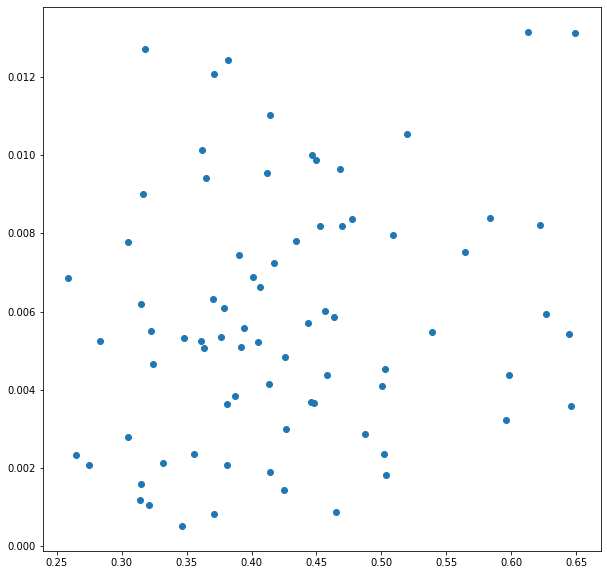

In [31]:
plt.scatter(class1_tr[:,4],class1_tr[:,8])